<a href="https://colab.research.google.com/github/ziatdinovmax/atomai/blob/master/examples/notebooks/atomai_atomstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Short tutorial on how to use *atomstat* module

Prepared by Maxim Ziatdinov

E-mail: maxim.ziatdinov@ai4microscopy.com

## Install AtomAI

Installation:

In [2]:
!pip install -q git+https://github.com/ziatdinovmax/atomai.git

Import modules:

In [0]:
from atomai import atomnet, atomstat, models
from atomai.utils import load_model
import numpy as np

Download the trained weights and test image:

In [0]:
download_link = 'https://drive.google.com/uc?id=1gs5myob3qVRTHksq3qU90OHLZNH5ynT6'
!gdown -q $download_link -O 'test_data.npz'
!unzip -qq 'test_data.npz'

## Ferroic blocks analysis with atomstat

First we need to load the trained model. To do this, after we specify a path to file with the trained weights and model type. We are going to use the weights trained in the [atomai-atomnet notebook](https://colab.research.google.com/github/ziatdinovmax/atomai/blob/master/examples/notebooks/atomai_atomnet.ipynb#scrollTo=XGxhL7ha1Y3R). By default all models that we train are *dilUnet*. Notice that in principle you can use the code in the cell below to load any pytorch model (as long as you have trained weights for that model).

In [0]:
# Path to file with trained weights
weights_path = '/content/simple_model_weights.pt'
# initialize model (by default all models that we train are 'dilUnet')
model = models.dilUnet(nb_classes=3)
# load the weights into the model skeleton
model = load_model(model, weights_path)

Make a prediction with the loaded model:

In [11]:
# Load experimental data
expdata = np.load('bfo_test_img.npy')
# Get raw NN output
nn_input, nn_output = atomnet.predictor(
    expdata, model, use_gpu=False).run()
# Transform NN output into atomic coordinates
coordinates = atomnet.locator(nn_output).run()

1 image was decoded in approximately 4.2321 seconds


Here we are going to use *atomstat* module to get local image descriptors first (i.e. stack of subimages around one of the atom types) and then perform different types of statistical analysis on them. This is similar to what we did in *Applied Physics Letters 115, 052902 (2019)* (although here we are going to use a different model and the image was downsized by a factor of 2 to allow faster inference, without using a GPU).

Get local descriptors, which are subimages centered on one of the sublattices:

In [0]:
imstack = atomstat.imlocal(nn_output, coordinates, r=16, coord_class=1)

Compute PCA scree plot to estimate the number of components/sources for the multivariate analysis below:

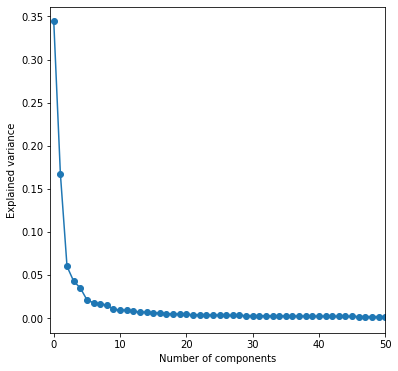

In [23]:
imstack.pca_scree_plot(plot_results=True);

Do PCA analysis and plot results:

NUMBER OF COMPONENTS: 4


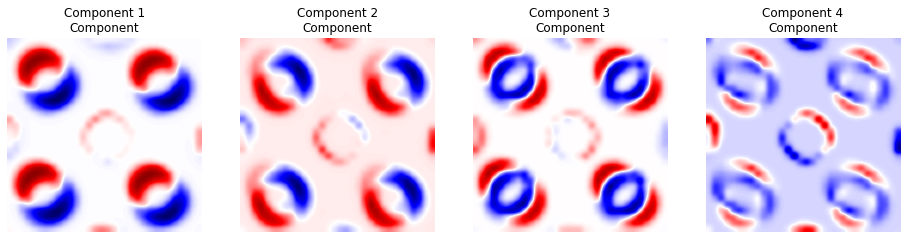

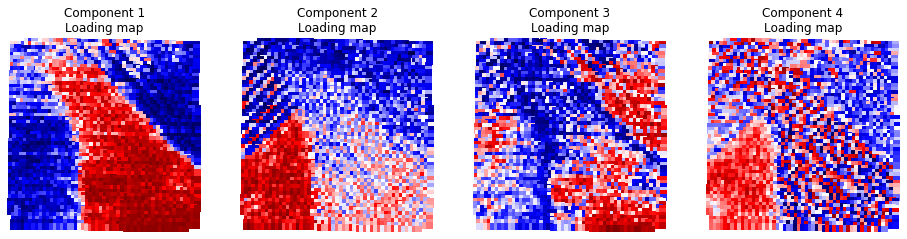

In [24]:
pca_results = imstack.imblock_pca(4, plot_results=True)

Do ICA analysis and plot results:

NUMBER OF COMPONENTS: 4


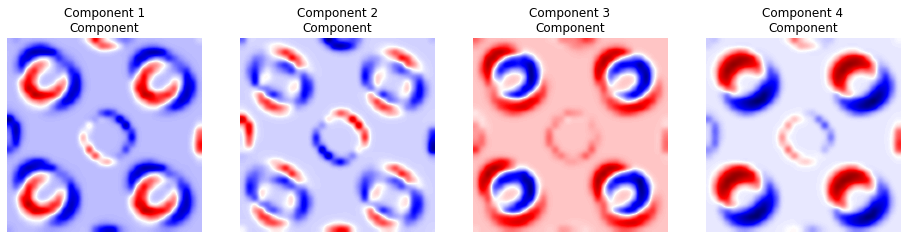

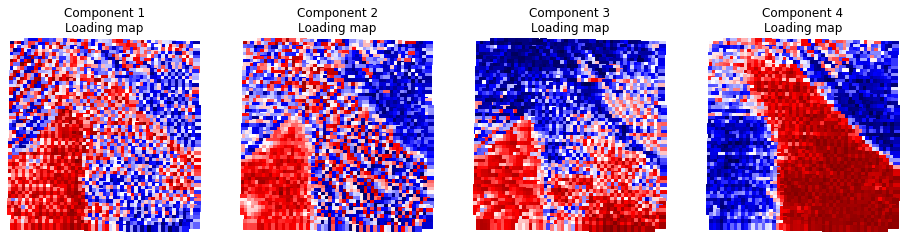

In [25]:
ica_results = imstack.imblock_ica(4, plot_results=True)

Do NMF analysis and plot results:

NUMBER OF COMPONENTS: 4


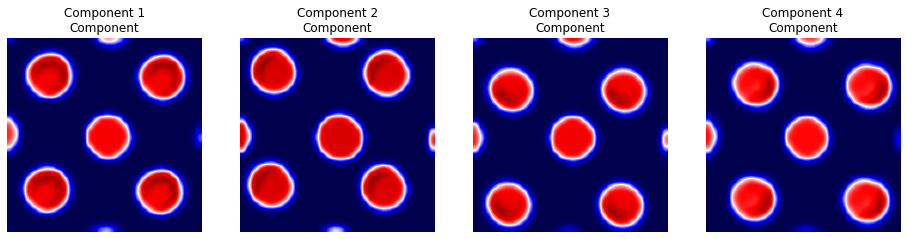

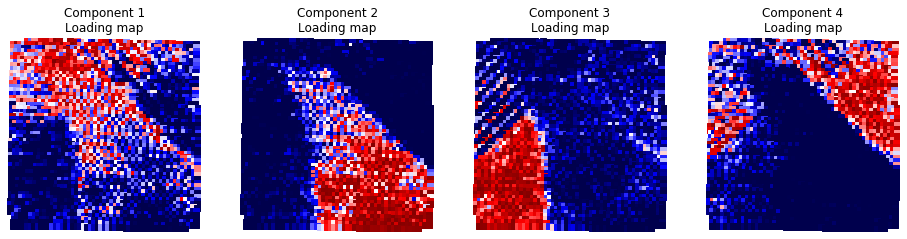

In [26]:
nmf_results = imstack.imblock_nmf(4, plot_results=True)